In [2]:
import os
import mahotas as mh
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.html.widgets import interact, fixed
import pandas as pd
from sklearn.externals import joblib
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # 10 x 8 inches
plt.gray()

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
clf = joblib.load('/cellar/users/ramarty/Data/ants/gold_standard/classifiers/random_forest.size_100.pkl')

Visualize sample photo - #19

In [5]:
files = list(set([x.split('.')[0] for x in os.listdir('/cellar/users/ramarty/Data/ants/gold_standard/photos/') if ('box101' in x) or ('box61' in x)]))

In [7]:
len(files)

31

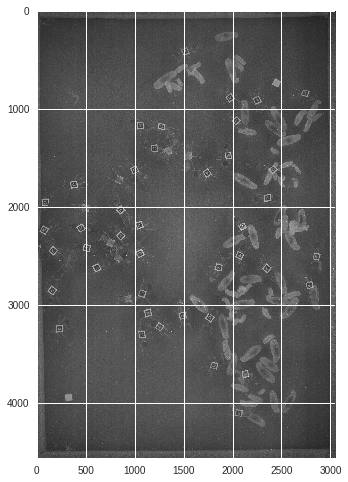

In [63]:
im = mh.imread('/cellar/users/ramarty/Data/ants/gold_standard/photos/{0}.pgm'.format(files[19]))
plt.imshow(im)

Scan through sample photos; classify; save matrix

In [10]:
test_file = '/cellar/users/ramarty/Data/ants/gold_standard/photos/{0}.pgm'.format(files[19])
test_file_gs = '/cellar/users/ramarty/Data/ants/gold_standard/photos/{0}.png'.format(files[19])

In [ ]:
step = 20
image_size = 100
im = mh.imread(test_file)
x_total, y_total = im.shape[1], im.shape[0]
prediction_matrix = [[[] for k in range(x_total)] for l in range(y_total)]
# cycle through photo
print y_total, x_total
for i_index, i in enumerate(range(0, y_total-step, step)):
    print i_index
    for j_index, j in enumerate(range(0, x_total-step, step)):
        test_features = mh.features.haralick(im[i:i+image_size, j:j+image_size], return_mean_ptp=True) 
        prediction = clf.predict_proba(test_features)[0][0]
        # might need to done this down a little... taking FOREVER
        for i_single in range(i, i+image_size):
            for j_single in range(j, j+image_size):
                try:
                    prediction_matrix[i_single][j_single].append(prediction)
                except:
                    None

4560 3048
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141

In [ ]:
summary_matrix = [[0 for k in range(int(float(x_total-20)/20))] for l in range(int(float(y_total-20)/20))]
for i_index, i in enumerate(range(0, y_total-100, 20)):
    for j_index, j in enumerate(range(0, x_total-100, 20)):
        #summary_matrix[i_index][j_index] = np.percentile(prediction_matrix[i_index][j_index], 35)
        summary_matrix[i_index][j_index] = np.median(prediction_matrix[i_index][j_index])
        #summary_matrix[i_index][j_index] = cutoff(prediction_matrix[i_index][j_index])

In [78]:
def plot_results(prediction_matrix, test_file, test_file_gs):
    plt.figure(figsize=(6,8))
    # predictions
    sns.heatmap(prediction_matrix)
    plt.show()
    plt.clf()
    # gold standard
    im = mh.imread(test_file_gs)
    plt.imshow(im)
    plt.show()
    plt.clf()
    # photo
    im = mh.imread(test_file)
    plt.imshow(im)

In [69]:
def test_photo(test_file):
    prediction_matrix = []
    im = mh.imread(test_file)
    y1, y2, x1, x2 = 0, im.shape[0], 0, im.shape[1]
    print y1, y2, x1, x2
    # cycle through photo
    y_total, x_total = im[y1:y2, x1:x2].shape
    print y_total, x_total
    for i in range(0, y_total-100, 100):
        prediction_array = []
        for j in range(0, x_total-100, 100):
            test_features = mh.features.haralick(im[y1+i:y1+i+100, x1+j:x1+j+100], return_mean_ptp=True) 
            prediction_array.append(clf.predict_proba(test_features)[0][0])
        prediction_matrix.append(prediction_array)
    return prediction_matrix

0 4560 0 3048
4560 3048


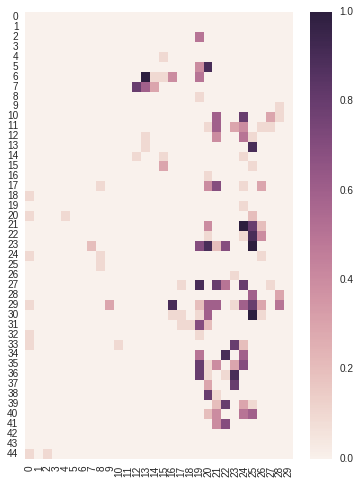

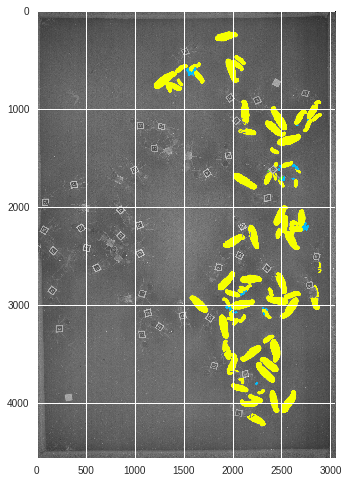

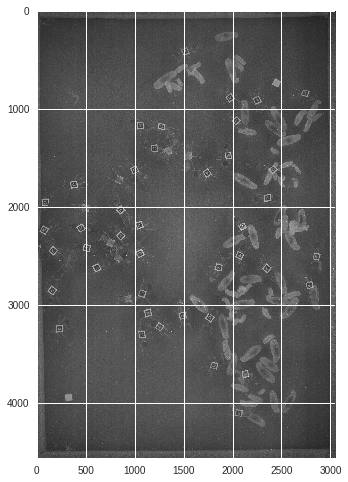

In [111]:
test_file, test_file_gs = test1_file, test1_file_gs
prediction_matrix1 = test_photo(test_file)
plot_results(prediction_matrix1, test_file, test_file_gs)

Maybe predict overlapping elements and merge results somehow?

In [ ]:
# one matrix with pixel locations
# another matrix with classifications covering the panel

In [7]:
test_file, test_file_gs = test1_file, test1_file_gs

In [ ]:
# location matrix with spaces for all
location_matrix = []
im = mh.imread(test_file)
y_total, x_total = im.shape[0], im.shape[1]
for i in range(0, y_total):
    location_array = []
    for j in range(0, x_total):
        location_array.append([i, i+20, j, j+20])
    location_matrix.append(location_array)

In [8]:

location_matrix = []
im = mh.imread(test_file)
y1, y2, x1, x2 = 0, im.shape[0], 0, im.shape[1]
y_total, x_total = im[y1:y2, x1:x2].shape
for i in range(0, y_total-20, 20):
    location_array = []
    for j in range(0, x_total-20, 20):
        location_array.append([i, i+20, j, j+20])
    location_matrix.append(location_array)

In [9]:
len(location_matrix), len(location_matrix[0])

(227, 152)

In [115]:
import warnings
warnings.filterwarnings('ignore')

In [116]:
y_total, x_total

(4560, 3048)

In [118]:
prediction_matrix = [[[] for k in range(int(float(x_total-20)/20))] for l in range(int(float(y_total-20)/20))]
im = mh.imread(test_file)
y1, y2, x1, x2 = 0, im.shape[0], 0, im.shape[1]
print y1, y2, x1, x2
# cycle through photo
y_total, x_total = im[y1:y2, x1:x2].shape
print y_total, x_total
for i_index, i in enumerate(range(0, y_total-20, 20)):
    print i_index
    for j_index, j in enumerate(range(0, x_total-20, 20)):
        test_features = mh.features.haralick(im[y1+i:y1+i+100, x1+j:x1+j+100], return_mean_ptp=True) 
        prediction = clf.predict_proba(test_features)[0][0]
        for i_single in range(i_index, i_index+5):
            for j_single in range(j_index, j_index+5):
                try:
                    prediction_matrix[i_single][j_single].append(prediction)
                except:
                    None

0 4560 0 3048
4560 3048
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226


Results with restricted_brood classifier - probably makes sense to save them as files!!!! But I'm a lazy bum

In [123]:
def cutoff(array):
    return sum(array)

In [124]:
summary_matrix = [[0 for k in range(int(float(x_total-20)/20))] for l in range(int(float(y_total-20)/20))]
for i_index, i in enumerate(range(0, y_total-100, 20)):
    for j_index, j in enumerate(range(0, x_total-100, 20)):
        #summary_matrix[i_index][j_index] = np.percentile(prediction_matrix[i_index][j_index], 35)
        summary_matrix[i_index][j_index] = np.median(prediction_matrix[i_index][j_index])
        #summary_matrix[i_index][j_index] = cutoff(prediction_matrix[i_index][j_index])

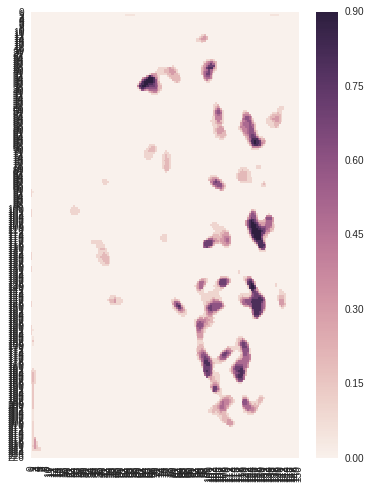

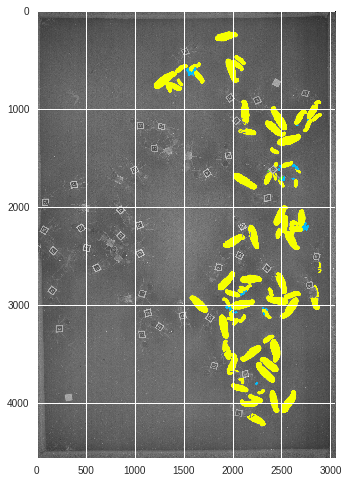

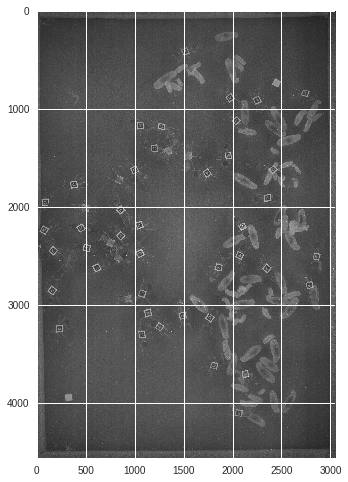

In [125]:
# median
plt.figure(figsize=(6,8))
sns.heatmap(summary_matrix)
plt.show()
plt.clf()
im = mh.imread(test_file_gs)
plt.imshow(im)
plt.show()
plt.clf()
im = mh.imread(test_file)
plt.imshow(im)

In [127]:
summary_matrix = [[0 for k in range(int(float(x_total-20)/20))] for l in range(int(float(y_total-20)/20))]
for i_index, i in enumerate(range(0, y_total-100, 20)):
    for j_index, j in enumerate(range(0, x_total-100, 20)):
        summary_matrix[i_index][j_index] = cutoff(prediction_matrix[i_index][j_index])

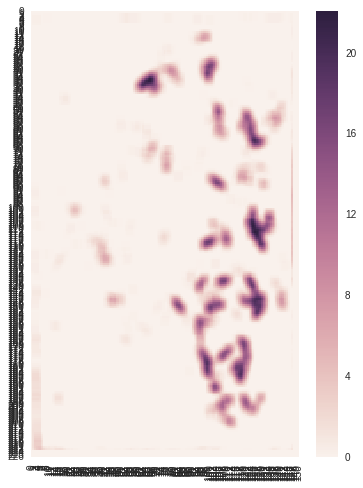

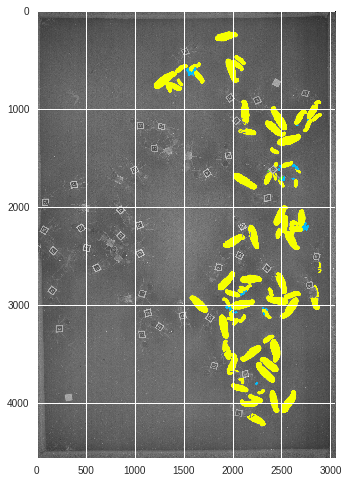

In [128]:
# cutoff
plt.figure(figsize=(6,8))
sns.heatmap(summary_matrix)
plt.show()
plt.clf()
im = mh.imread(test_file_gs)
plt.imshow(im)

In [131]:
def cutoff(array):
    if sum(array) > 10 and len([x for x in array if x > .45]) > 15:
        return True
    else:
        return False

In [134]:
summary_matrix = [[0 for k in range(int(float(x_total-20)/20))] for l in range(int(float(y_total-20)/20))]
for i_index, i in enumerate(range(0, y_total-100, 20)):
    for j_index, j in enumerate(range(0, x_total-100, 20)):
        #summary_matrix[i_index][j_index] = np.percentile(prediction_matrix[i_index][j_index], 35)
        #summary_matrix[i_index][j_index] = np.median(prediction_matrix_without_ants[i_index][j_index])
        summary_matrix[i_index][j_index] = cutoff(prediction_matrix[i_index][j_index])

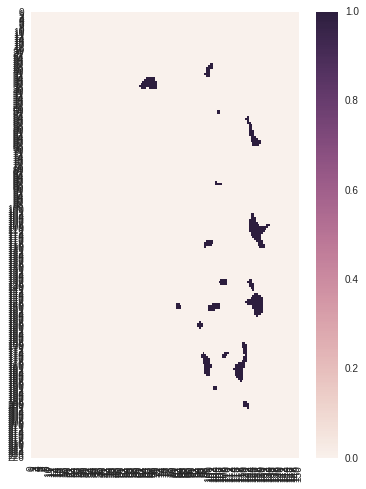

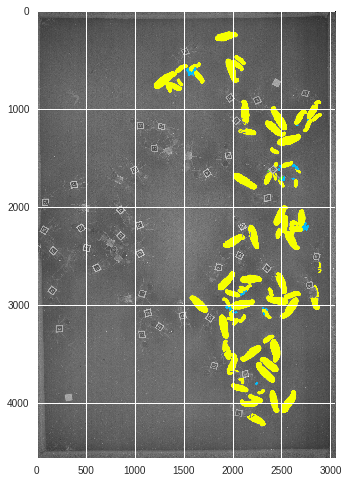

In [152]:
# cutoff
plt.figure(figsize=(6,8))
sns.heatmap(summary_matrix)
plt.show()
plt.clf()
im = mh.imread(test_file_gs)
plt.imshow(im)

Results with beta classifier

In [129]:
summary_matrix = [[0 for k in range(int(float(x_total-20)/20))] for l in range(int(float(y_total-20)/20))]
for i_index, i in enumerate(range(0, y_total-100, 20)):
    for j_index, j in enumerate(range(0, x_total-100, 20)):
        #summary_matrix[i_index][j_index] = np.percentile(prediction_matrix[i_index][j_index], 15)
        summary_matrix[i_index][j_index] = np.median(prediction_matrix[i_index][j_index])

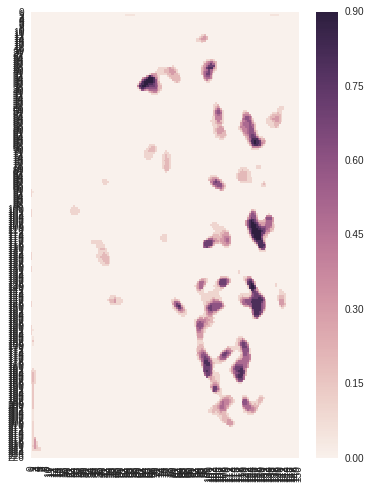

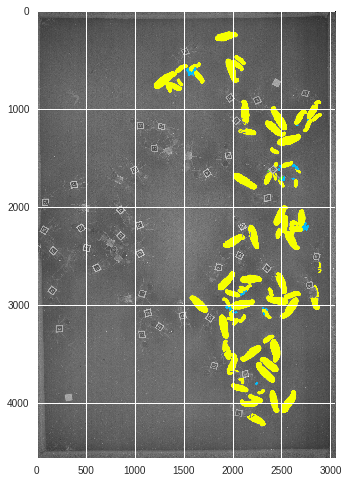

In [130]:
# median
plt.figure(figsize=(6,8))
sns.heatmap(summary_matrix)
plt.show()
plt.clf()
im = mh.imread(test_file_gs)
plt.imshow(im)

Test two

In [153]:
test_file, test_file_gs = test2_file, test2_file_gs

In [154]:
location_matrix = []
im = mh.imread(test_file)
y1, y2, x1, x2 = 0, im.shape[0], 0, im.shape[1]
y_total, x_total = im[y1:y2, x1:x2].shape
for i in range(0, y_total-20, 20):
    location_array = []
    for j in range(0, x_total-20, 20):
        location_array.append([i, i+20, j, j+20])
    location_matrix.append(location_array)

In [155]:
prediction_matrix = [[[] for k in range(int(float(x_total-20)/20))] for l in range(int(float(y_total-20)/20))]
im = mh.imread(test_file)
y1, y2, x1, x2 = 0, im.shape[0], 0, im.shape[1]
print y1, y2, x1, x2
# cycle through photo
y_total, x_total = im[y1:y2, x1:x2].shape
print y_total, x_total
for i_index, i in enumerate(range(0, y_total-20, 20)):
    print i_index
    for j_index, j in enumerate(range(0, x_total-20, 20)):
        test_features = mh.features.haralick(im[y1+i:y1+i+100, x1+j:x1+j+100], return_mean_ptp=True) 
        prediction = clf.predict_proba(test_features)[0][0]
        for i_single in range(i_index, i_index+5):
            for j_single in range(j_index, j_index+5):
                try:
                    prediction_matrix[i_single][j_single].append(prediction)
                except:
                    None

0 4560 0 3048
4560 3048
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226


In [156]:
summary_matrix = [[0 for k in range(int(float(x_total-20)/20))] for l in range(int(float(y_total-20)/20))]
for i_index, i in enumerate(range(0, y_total-100, 20)):
    for j_index, j in enumerate(range(0, x_total-100, 20)):
        #summary_matrix[i_index][j_index] = np.percentile(prediction_matrix[i_index][j_index], 35)
        summary_matrix[i_index][j_index] = np.median(prediction_matrix[i_index][j_index])
        #summary_matrix[i_index][j_index] = cutoff(prediction_matrix[i_index][j_index])

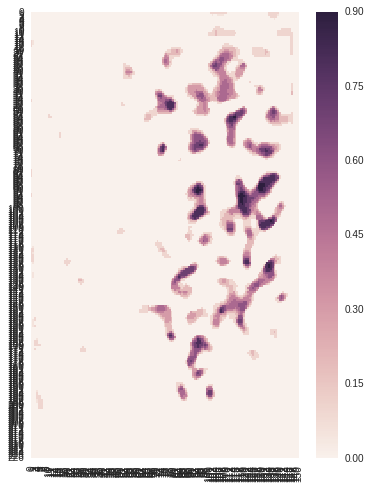

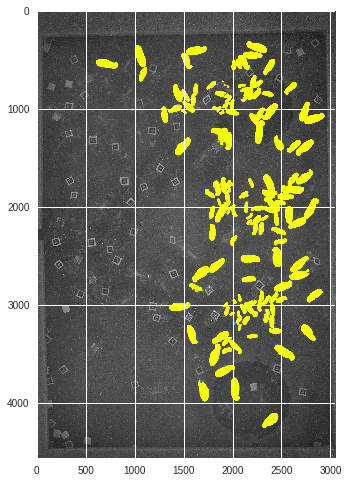

In [157]:
# median
plt.figure(figsize=(6,8))
sns.heatmap(summary_matrix)
plt.show()
plt.clf()
im = mh.imread(test_file_gs)
plt.imshow(im)